In [ ]:
#Parte 1: ESTIMADOS DE LOCACIÓN Y VARIABILIDAD

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd

In [2]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('C:/Users/chris/Proyectos BEDU/Proyecto Análisis de datos en Python/Video Games Sales.csv')

df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv('C:/Users/chris/Proyectos BEDU/Proyecto Análisis de datos en Python/Video Games Sales.csv')

# Eliminar filas con valores nulos
df = df.dropna()

# Renombrar columnas
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Rank': 'Rango',
    'Game Title': 'Título del Juego',
    'Platform': 'Plataforma',
    'Year': 'Año de Lanzamiento',
    'Genre': 'Género',
    'Publisher': 'Casa Productora',
    'North America': 'América del Norte',
    'Europe': 'Europa',
    'Japan': 'Japón',
    'Rest of World': 'Resto del Mundo',
    'Global': 'Global',
    'Review': 'Puntaje de Reseña'
})

# Limpiar y preparar las columnas
df['Título del Juego'] = df['Título del Juego'].str.strip().str.title()
df['Año de Lanzamiento'] = df['Año de Lanzamiento'].astype(int)
df['América del Norte'] = pd.to_numeric(df['América del Norte'], errors='coerce')
df['Europa'] = pd.to_numeric(df['Europa'], errors='coerce')
df['Japón'] = pd.to_numeric(df['Japón'], errors='coerce')
df['Resto del Mundo'] = pd.to_numeric(df['Resto del Mundo'], errors='coerce')
df['Global'] = pd.to_numeric(df['Global'], errors='coerce')

# Asegurarse de que 'Puntaje de Reseña' no tenga valores nulos
df['Puntaje de Reseña'] = pd.to_numeric(df['Puntaje de Reseña'], errors='coerce')
df['Puntaje de Reseña'] = df['Puntaje de Reseña'].fillna(df['Puntaje de Reseña'].mean())  # Llenar NaNs con la media

In [5]:
!pip install seaborn

In [7]:
import pandas as pd

# Cargar el dataset (suponiendo que ya lo tienes cargado en df)
# df = pd.read_csv('ruta/a/tu/dataset.csv')  # Reemplaza con la ruta de tu dataset

# 1. ¿Cuál fue el "género" de videojuegos más vendido en "América del Norte"?
ventas_por_genero = df.groupby('Género')['América del Norte'].sum()
genero_mas_vendido = ventas_por_genero.idxmax()
ventas_genero_mas_vendido = ventas_por_genero.max()
print(f"El género más vendido en América del Norte fue: {genero_mas_vendido} con {ventas_genero_mas_vendido} millones de ventas.")

# 2. ¿Cuál es el promedio de "Puntaje de Reseña" en videojuegos de la empresa "Electronic Arts"?
ea_games = df[df['Casa Productora'] == 'Electronic Arts']
promedio_puntaje = ea_games['Puntaje de Reseña'].mean()
print(f"El promedio de Puntaje de Reseña de videojuegos de Electronic Arts es: {promedio_puntaje}")

# 3. Calcular la mediana en ventas de videojuegos en Japón, para no tomar en cuenta títulos populares.
Q1_japon = df['Japón'].quantile(0.25)
Q3_japon = df['Japón'].quantile(0.75)
IQR_japon = Q3_japon - Q1_japon
lower_bound_japon = Q1_japon - 1.5 * IQR_japon
upper_bound_japon = Q3_japon + 1.5 * IQR_japon
df_japon_filtrado = df[(df['Japón'] >= lower_bound_japon) & (df['Japón'] <= upper_bound_japon)]
mediana_japon = df_japon_filtrado['Japón'].median()
print(f"La mediana de ventas en Japón sin los valores atípicos es: {mediana_japon}")

# 4. Calcular la mediana truncada de ventas de videojuego del género "Adventure".
adventure_games = df[df['Género'] == 'Adventure']
truncada_adventure = adventure_games['Global'].sort_values()
truncada_adventure = truncada_adventure[int(len(truncada_adventure) * 0.1):int(len(truncada_adventure) * 0.9)]
mediana_truncada_adventure = truncada_adventure.median()
print(f"La mediana truncada de ventas del género 'Adventure' es: {mediana_truncada_adventure}")

# 5. Calcular el rango de ventas de videojuegos entre regiones durante el año 2010.
juegos_2010 = df[df['Año de Lanzamiento'] == 2010]
rango_ventas_2010 = juegos_2010[['América del Norte', 'Europa', 'Japón', 'Resto del Mundo', 'Global']].max() - juegos_2010[['América del Norte', 'Europa', 'Japón', 'Resto del Mundo', 'Global']].min()
print("Rango de ventas por región en 2010:")
print(rango_ventas_2010)

# 6. Calcular los "Percentiles 25 y 75" para las ventas de un solo título de un videojuego; en este caso "Metal Gear Solid: Peace Walker".
metal_gear = df[df['Título del Juego'] == 'Metal Gear Solid: Peace Walker']
percentiles = metal_gear[['América del Norte', 'Europa', 'Japón', 'Resto del Mundo', 'Global']].quantile([0.25, 0.75])
print("Percentiles 25 y 75 para las ventas de 'Metal Gear Solid: Peace Walker':")
print(percentiles)

# 7. Calcular el "Rango Intercuartil Alto" de los tres géneros de videojuegos más vendidos en la región de "América del Norte" y durante los años 2005 y 2010.
juegos_2005_2010 = df[(df['Año de Lanzamiento'] == 2005) | (df['Año de Lanzamiento'] == 2010)]
ventas_por_genero_am = juegos_2005_2010.groupby('Género')['América del Norte'].sum()
top_3_generos_am = ventas_por_genero_am.nlargest(3).index
juegos_top_generos = juegos_2005_2010[juegos_2005_2010['Género'].isin(top_3_generos_am)]
iqr_alto = {}
for genero in top_3_generos_am:
    ventas_genero = juegos_top_generos[juegos_top_generos['Género'] == genero]['América del Norte']
    Q1 = ventas_genero.quantile(0.25)
    Q3 = ventas_genero.quantile(0.75)
    IQR = Q3 - Q1
    iqr_alto[genero] = Q3 + 1.5 * IQR
print("Rango Intercuartil Alto de los tres géneros más vendidos en América del Norte (2005-2010):")
print(iqr_alto)


El género más vendido en América del Norte fue: Sports con 347.45 millones de ventas.
El promedio de Puntaje de Reseña de videojuegos de Electronic Arts es: 79.69831360946745
La mediana de ventas en Japón sin los valores atípicos es: 0.01
La mediana truncada de ventas del género 'Adventure' es: 1.62
Rango de ventas por región en 2010:
América del Norte    13.50
Europa                4.34
Japón                 5.64
Resto del Mundo       1.82
Global               19.07
dtype: float64
Percentiles 25 y 75 para las ventas de 'Metal Gear Solid: Peace Walker':
      América del Norte  Europa  Japón  Resto del Mundo  Global
0.25               0.41    0.34   0.96             0.21    1.92
0.75               0.41    0.34   0.96             0.21    1.92
Rango Intercuartil Alto de los tres géneros más vendidos en América del Norte (2005-2010):
{'Shooter': 2.54625, 'Action': 2.1675, 'Misc': 4.8525}


C:\Users\chris\AppData\Local\Temp\ipykernel_9232\4167306310.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_genero, x="Género", y="América del Norte", palette="viridis")


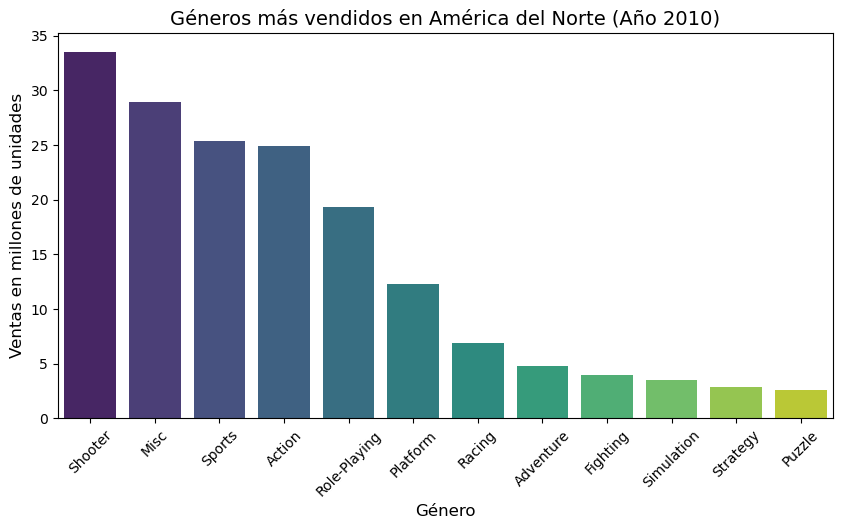

In [93]:
# Paso 2: INTRODUCCIÓN A LA VISUALIZACIÓN DE DATOS: DISTRIBUCIONES
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo los datos del año 2010
datos_2010 = df[df['Año de Lanzamiento'] == 2010]

# Agrupar por género y sumar las ventas en América del Norte
ventas_por_genero = datos_2010.groupby('Género')['América del Norte'].sum().sort_values(ascending=False).reset_index()

# Crear gráfica de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=ventas_por_genero, x="Género", y="América del Norte", palette="viridis")

# Agregar títulos y etiquetas en español
plt.title("Géneros más vendidos en América del Norte (Año 2010)", fontsize=14)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Ventas en millones de unidades", fontsize=12)
plt.xticks(rotation=45)

# Mostrar gráfica
plt.show()


                           América del Norte  Europa  Japón  Resto del Mundo  \
Filtrado valores atípicos               1731    1728   1619             1711   

                           Global  Puntaje de Reseña  
Filtrado valores atípicos    1701               1796  


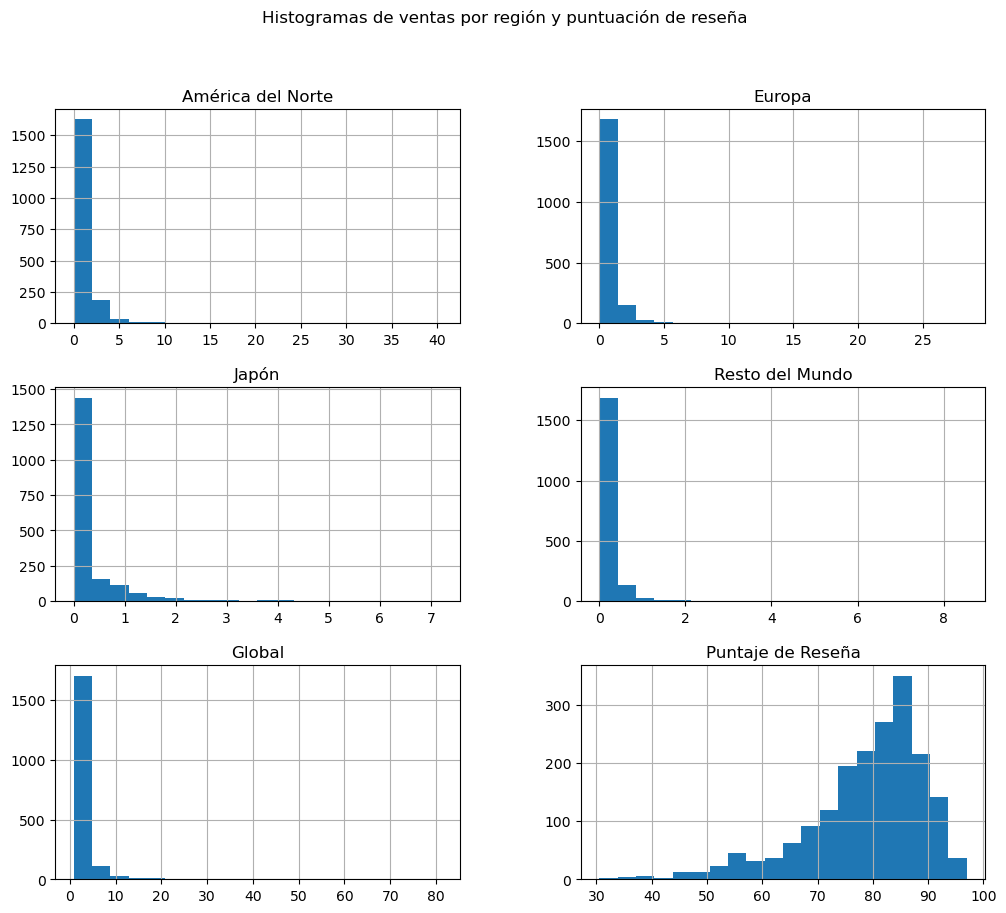

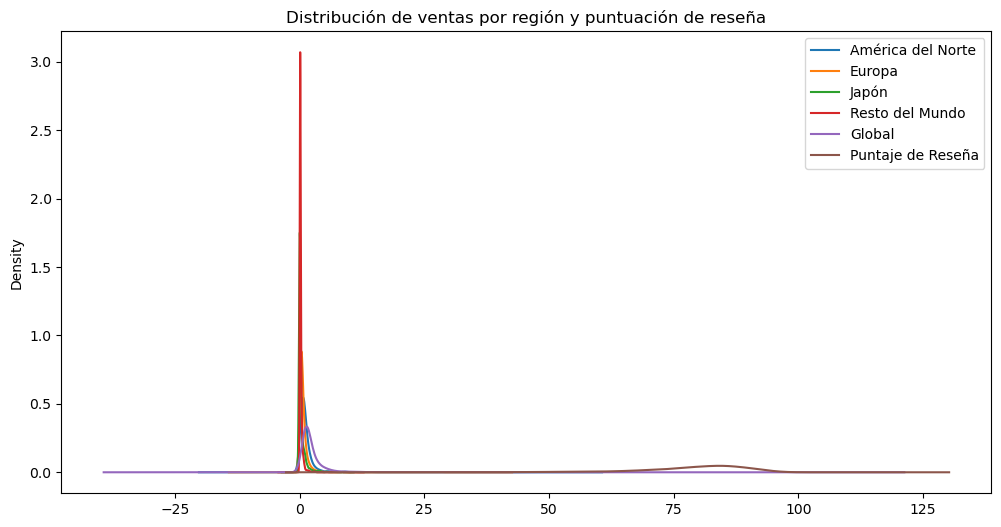

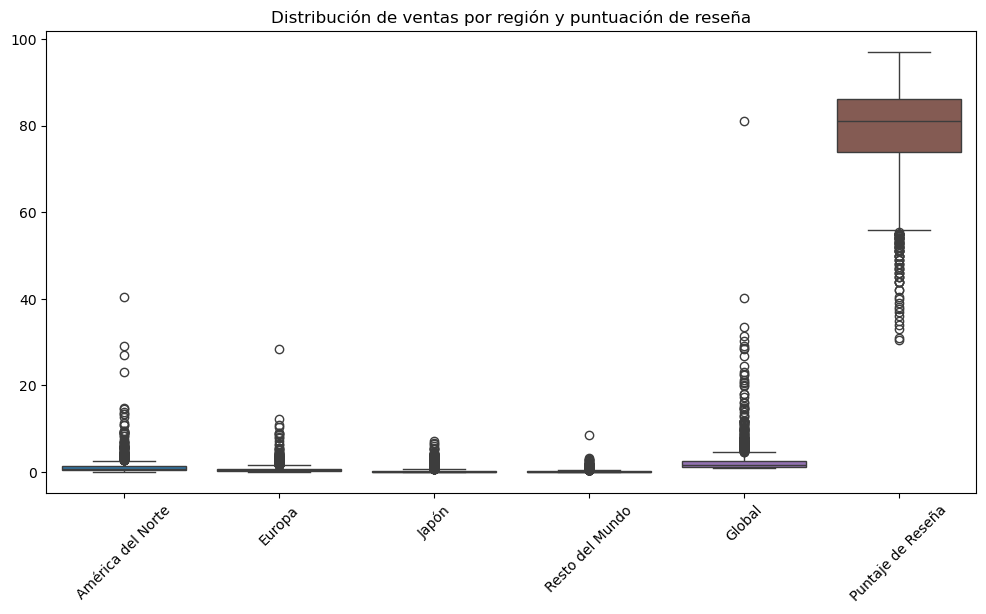

El género más vendido en América del Norte: Sports
Promedio de Puntaje de Reseña de Electronic Arts: 79.69831360946745
Mediana de ventas en Japón sin valores atípicos: 0.01
Mediana truncada de ventas del género 'Adventure': 1.62
Rango de ventas de videojuegos en 2010:
América del Norte    13.50
Europa                4.34
Japón                 5.64
Resto del Mundo       1.82
Global               19.07
Puntaje de Reseña    45.69
dtype: float64
                     América del Norte     Europa     Japón  Resto del Mundo  \
Promedio                      1.262109   0.710517  0.320980         0.207055   
Mediana                       0.820000   0.440000  0.020000         0.130000   
Desviación estándar           1.967797   1.155922  0.729295         0.345141   
Rango                        40.430000  28.390000  7.200000         8.540000   
Percentil 25                  0.510000   0.230000  0.000000         0.060000   
Percentil 75                  1.377500   0.820000  0.307500         0.2200

In [33]:
# Paso 3: EXPLORACIÓN DE VARIABLES CATEGÓRICAS Y ANÁLISIS MULTIVARIABLE
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la ruta del archivo
ruta = r"C:\Users\chris\Proyectos BEDU\Proyecto Análisis de datos en Python\Video Games Sales.csv"

# Cargar datos y limpieza inicial
df = pd.read_csv(ruta).dropna()
df.columns = df.columns.str.strip()

# Renombrar columnas
df = df.rename(columns={
    'Rank': 'Rango',
    'Game Title': 'Título del Juego',
    'Platform': 'Plataforma',
    'Year': 'Año de Lanzamiento',
    'Genre': 'Género',
    'Publisher': 'Casa Productora',
    'North America': 'América del Norte',                                                                                
    'Europe': 'Europa',
    'Japan': 'Japón',
    'Rest of World': 'Resto del Mundo',
    'Global': 'Global',
    'Review': 'Puntaje de Reseña'
})

# Normalización de datos
df['Título del Juego'] = df['Título del Juego'].str.strip().str.title()
df['Año de Lanzamiento'] = df['Año de Lanzamiento'].astype(int)
columnas_numericas = ['América del Norte', 'Europa', 'Japón', 'Resto del Mundo', 'Global', 'Puntaje de Reseña']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Cálculos estadísticos
def estadisticas_descriptivas(df, columnas):
    resultados = {col: {
        'Promedio': df[col].mean(),
        'Mediana': df[col].median(),
        'Desviación estándar': df[col].std(),
        'Rango': df[col].max() - df[col].min(),
        'Percentil 25': df[col].quantile(0.25),
        'Percentil 75': df[col].quantile(0.75),
        'Rango intercuartil': df[col].quantile(0.75) - df[col].quantile(0.25),
        'Media Truncada': df[col].sort_values()[int(len(df[col]) * 0.1):int(len(df[col]) * 0.9)].mean()
    } for col in columnas}
    return pd.DataFrame(resultados)

# Filtrado de valores atípicos
filtrado_atipicos = {
    col: df[(df[col] >= df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) &
             (df[col] <= df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))][col].count()
    for col in columnas_numericas
}
print(pd.DataFrame(filtrado_atipicos, index=['Filtrado valores atípicos']))

# Histogramas
df[columnas_numericas].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histogramas de ventas por región y puntuación de reseña')
plt.show()

# KDEplot
df[columnas_numericas].plot(kind='kde', figsize=(12, 6), title='Distribución de ventas por región y puntuación de reseña')
plt.legend()
plt.show()

# Visualización de datos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columnas_numericas])
plt.title('Distribución de ventas por región y puntuación de reseña')
plt.xticks(rotation=45)
plt.show()

# Análisis de datos específicos
print(f"El género más vendido en América del Norte: {df.groupby('Género')['América del Norte'].sum().idxmax()}")
ea_games = df[df['Casa Productora'] == 'Electronic Arts']
print(f"Promedio de Puntaje de Reseña de Electronic Arts: {ea_games['Puntaje de Reseña'].mean()}")

japon_filtrado = df[(df['Japón'] >= df['Japón'].quantile(0.25) - 1.5 * (df['Japón'].quantile(0.75) - df['Japón'].quantile(0.25))) &
                     (df['Japón'] <= df['Japón'].quantile(0.75) + 1.5 * (df['Japón'].quantile(0.75) - df['Japón'].quantile(0.25)))]
print(f"Mediana de ventas en Japón sin valores atípicos: {japon_filtrado['Japón'].median()}")

adventure_games = df[df['Género'] == 'Adventure']
mediana_truncada_adventure = adventure_games['Global'].sort_values()[int(len(adventure_games) * 0.1):int(len(adventure_games) * 0.9)].median()
print(f"Mediana truncada de ventas del género 'Adventure': {mediana_truncada_adventure}")

juegos_2010 = df[df['Año de Lanzamiento'] == 2010]
rango_ventas_2010 = juegos_2010[columnas_numericas].max() - juegos_2010[columnas_numericas].min()
print(f"Rango de ventas de videojuegos en 2010:\n{rango_ventas_2010}")

# Estadísticas descriptivas
print(estadisticas_descriptivas(df, columnas_numericas))


In [ ]:
#Paso 4: Correlaciones y Regresión Lineal Simple

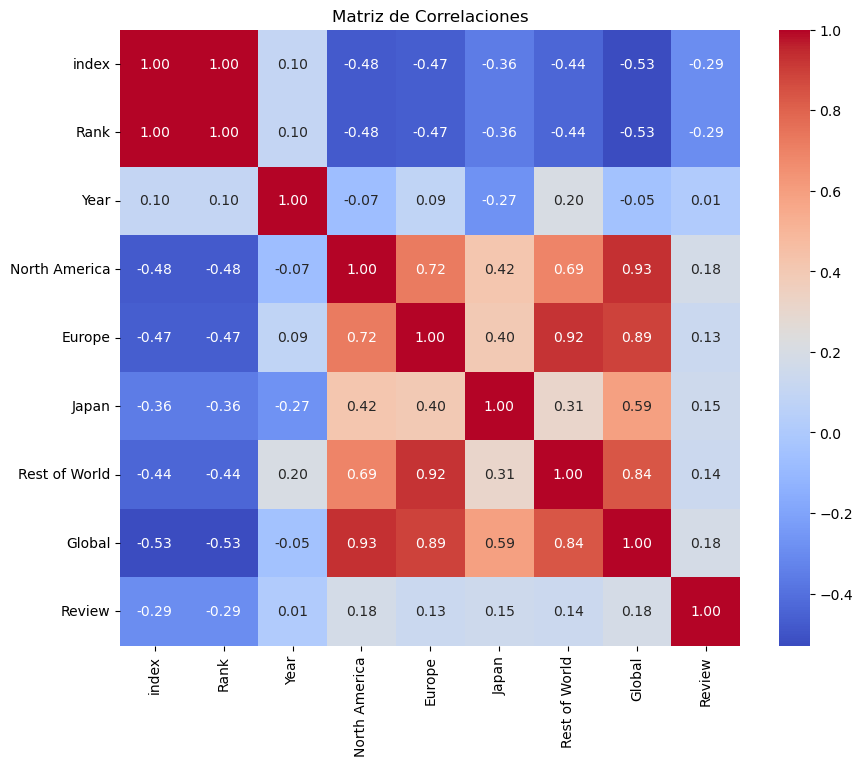

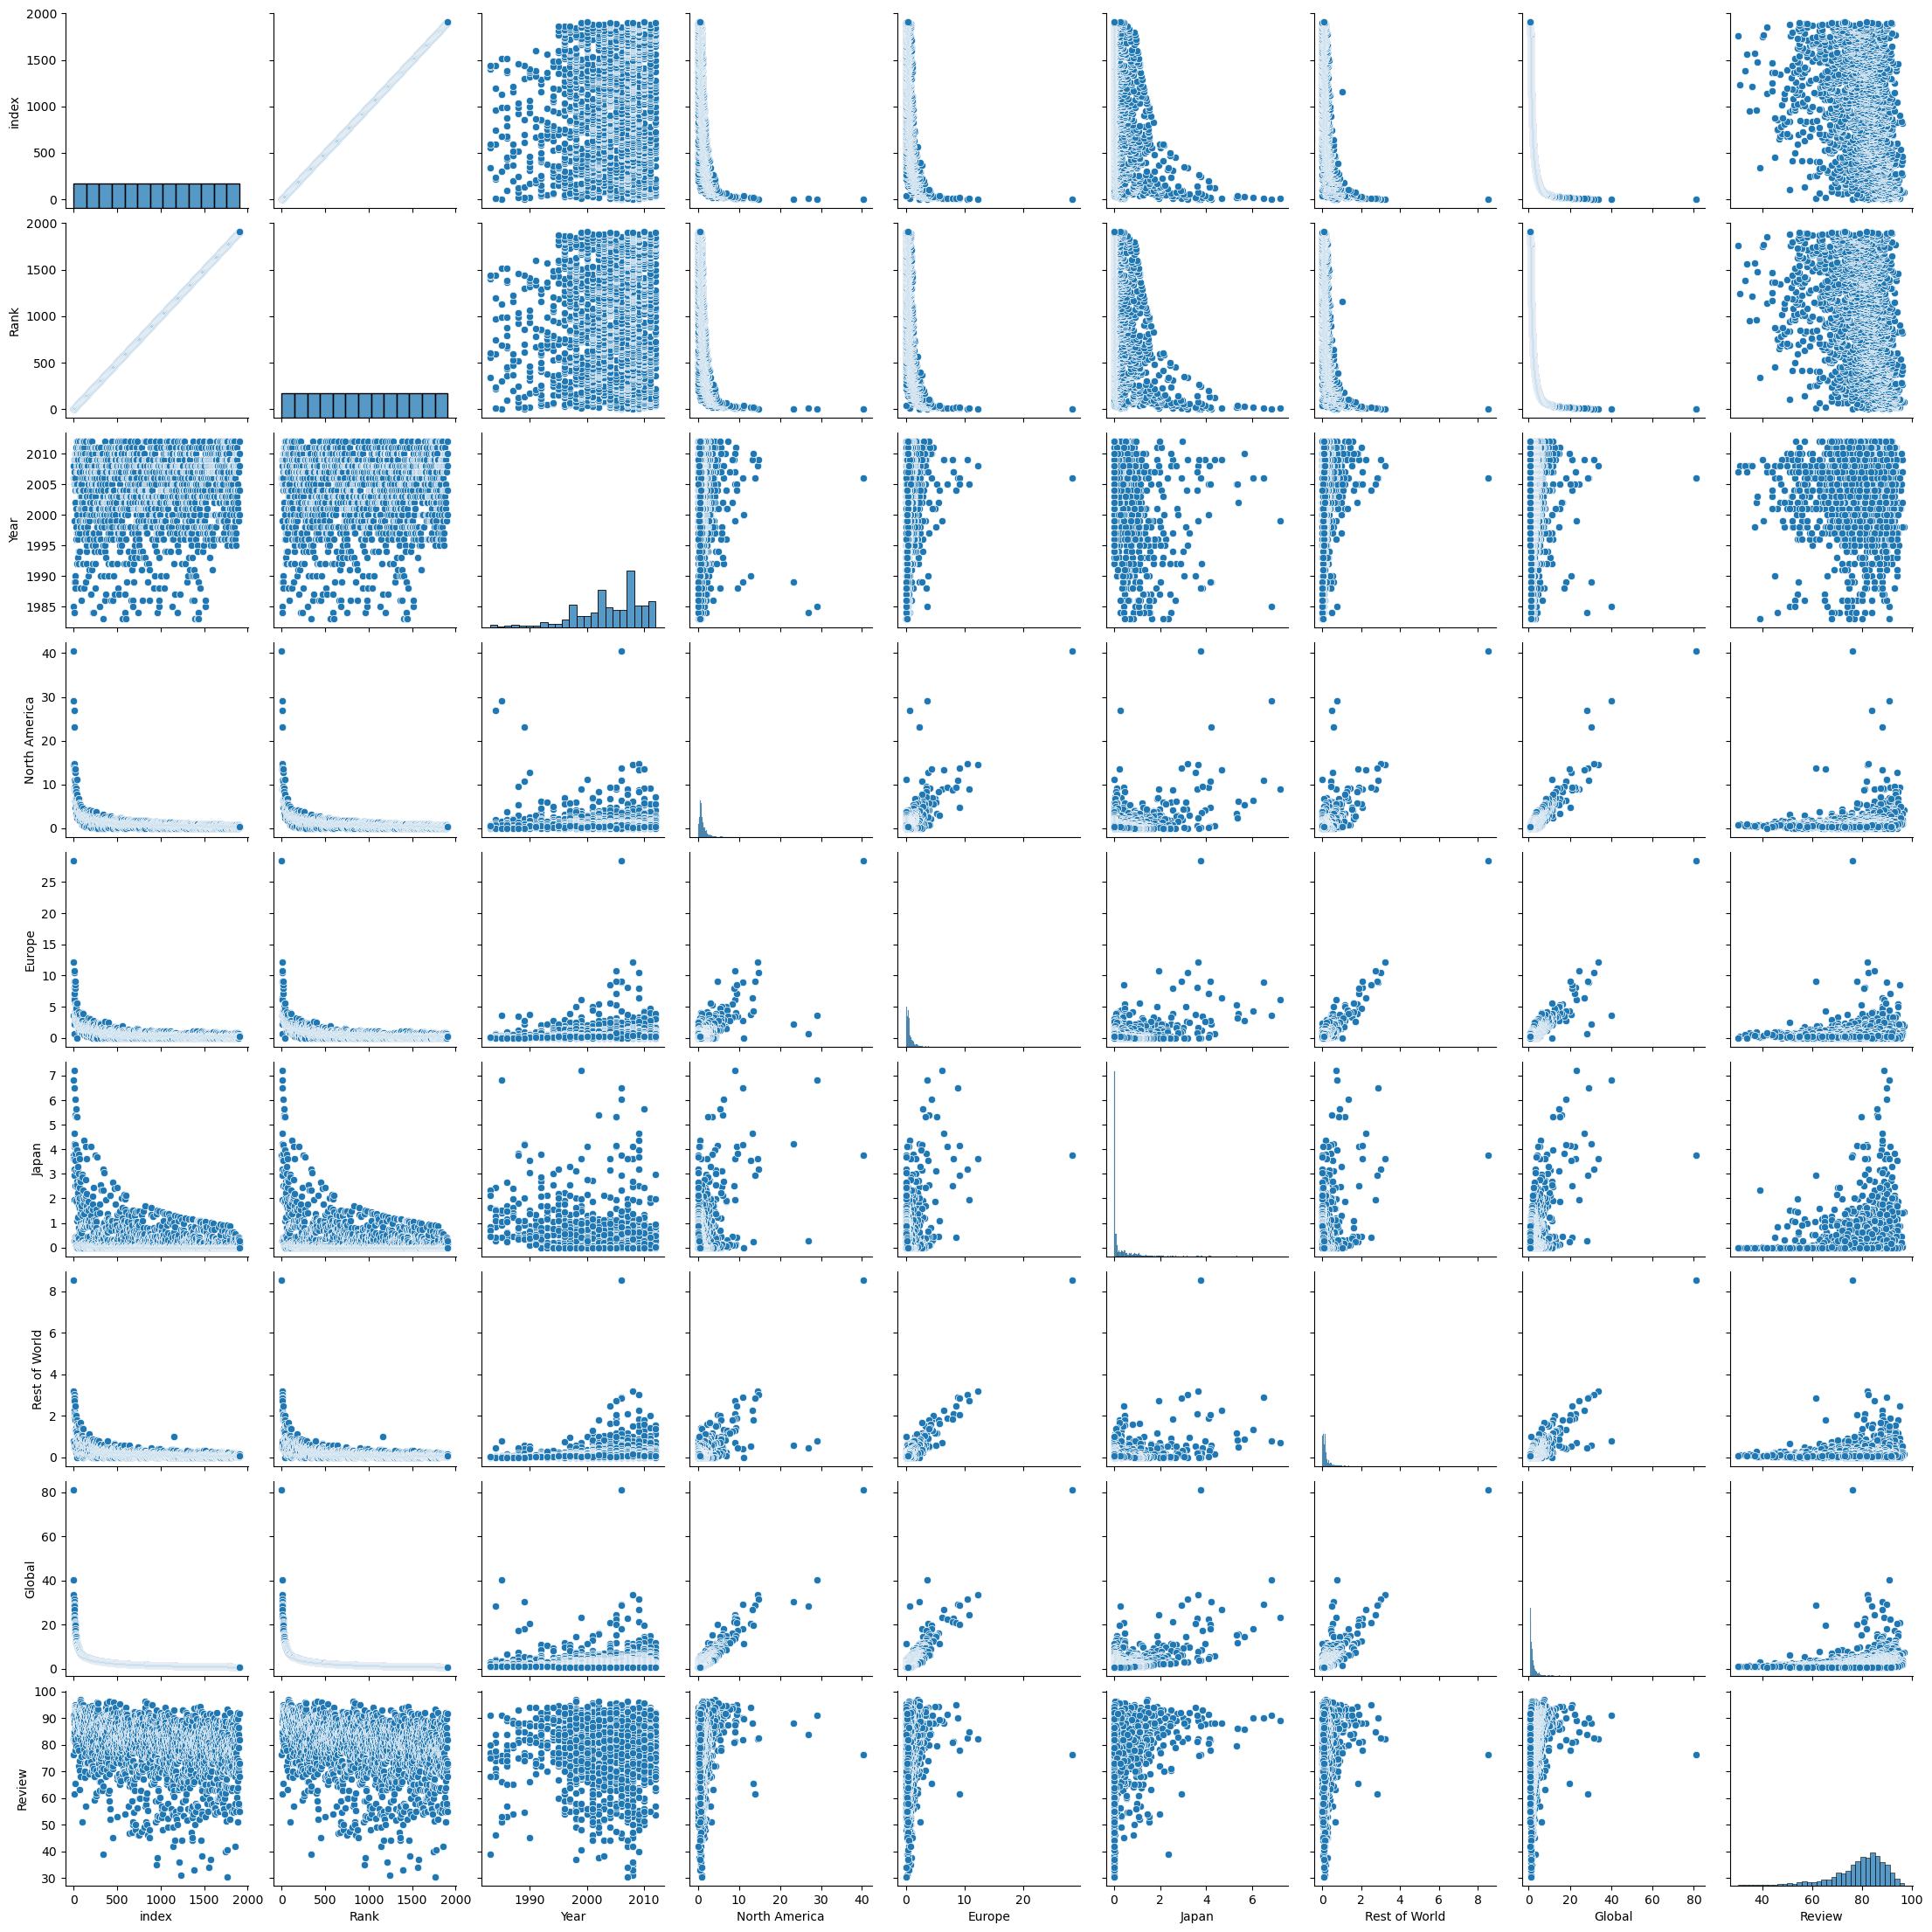

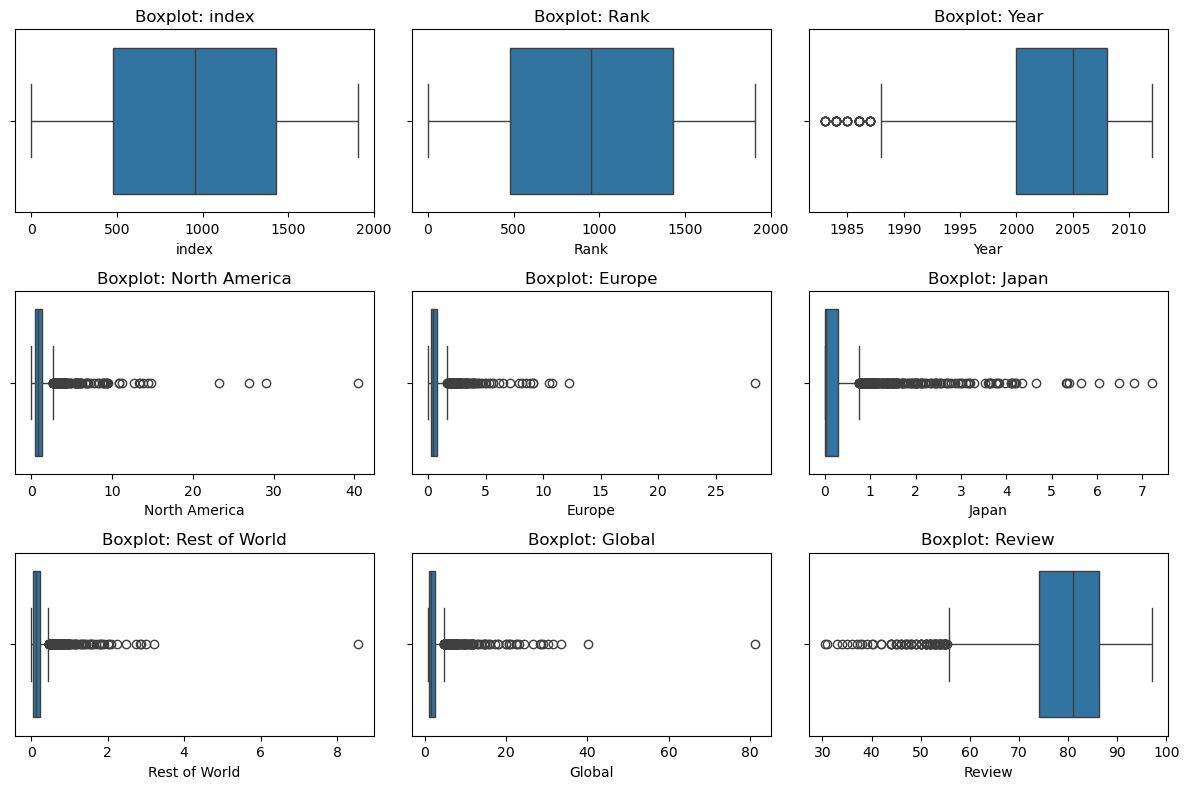

Valores atípicos en index:
1811    1811
1812    1812
1813    1813
1814    1814
1815    1815
        ... 
1902    1902
1903    1903
1904    1904
1905    1905
1906    1906
Name: index, Length: 96, dtype: int64
Valores atípicos en Rank:
1811    1812
1812    1813
1813    1814
1814    1815
1815    1816
        ... 
1902    1903
1903    1904
1904    1905
1905    1906
1906    1907
Name: Rank, Length: 96, dtype: int64
Valores atípicos en Year:
34      2012.0
50      2012.0
68      2012.0
95      2012.0
104     2012.0
120     2012.0
136     2012.0
177     2012.0
193     2012.0
213     2012.0
360     2012.0
438     2012.0
497     2012.0
509     2012.0
528     2012.0
549     2012.0
569     2012.0
594     2012.0
650     2012.0
703     2012.0
728     2012.0
808     2012.0
812     2012.0
825     2012.0
827     2012.0
877     2012.0
945     2012.0
995     2012.0
1064    2012.0
1075    2012.0
1093    2012.0
1147    2012.0
1155    2012.0
1196    2012.0
1220    2012.0
1244    2012.0
1260    2012.0
1278 

In [39]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('C:/Users/chris/Proyectos BEDU/Proyecto Análisis de datos en Python/Video Games Sales.csv')

# Verificar las primeras filas del dataset
df.head()
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar las variables numéricas
numerical_cols = df.select_dtypes(include='number').columns

# Crear la matriz de correlaciones
correlation_matrix = df[numerical_cols].corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlaciones")
plt.show()

# Crear pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(df[numerical_cols])
plt.show()
 # Graficar un boxplot para ver los valores atípicos en las columnas numéricas
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

# Identificación de valores atípicos: Ver los valores por encima del percentil 95
for col in numerical_cols:
    print(f"Valores atípicos en {col}:")
    print(df[df[col] > df[col].quantile(0.95)][col])


In [ ]:
#Paso 4: Regresión inea simple:

Error cuadrático medio (MSE): 109.0129544119982
R^2: 0.030729910884642386


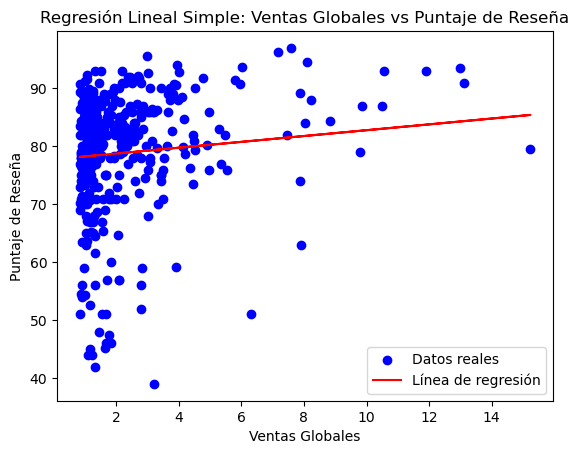

   Global  Puntaje de Reseña
0   81.12              76.28
1   40.24              91.00
2   33.55              82.07
3   31.52              82.65
4   30.26              88.00


In [65]:
# Preparar los datos para la regresión
X = df[['Global']]  # Variable predictora (Ventas globales)
y = df['Puntaje de Reseña']  # Variable objetivo (Puntaje de Reseña)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados de la regresión
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R^2: {r2}")

# Visualización de los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Ventas Globales')
plt.ylabel('Puntaje de Reseña')
plt.title('Regresión Lineal Simple: Ventas Globales vs Puntaje de Reseña')
plt.legend()
plt.show()

# Verifica que las columnas estén listas para la regresión
print(df[['Global', 'Puntaje de Reseña']].head())

Error cuadrático medio (MSE): 97.0989124081464
R^2 (Coeficiente de determinación): 0.13666158310732046
El modelo tiene un ajuste pobre, el R^2 es bajo.


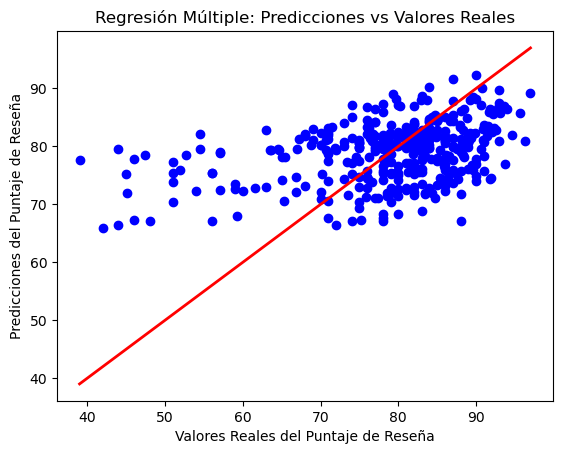

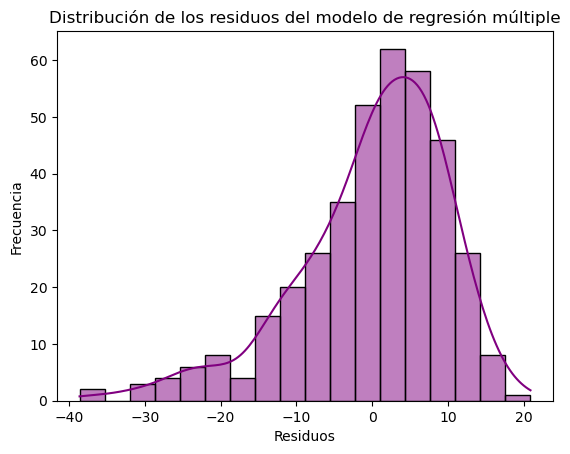

Promedio de los residuos: -0.01562348637733975
Desviación estándar de los residuos: 9.866995393583231
Error absoluto medio (MAE): 7.57981109892844


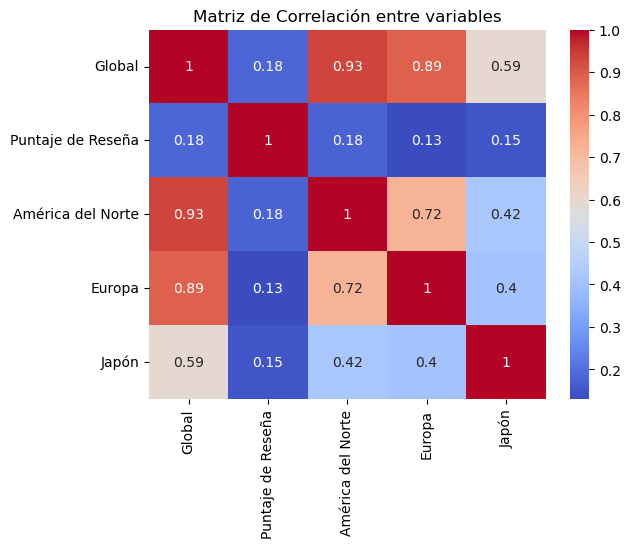

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 5: Evaluación del Modelo

# Usamos varias características para la regresión múltiple
X = df[['Global', 'América del Norte', 'Europa', 'Japón', 'Género', 'Plataforma']]  # Variables predictoras
X = pd.get_dummies(X, drop_first=True)  # Convertir variables categóricas en variables dummy

y = df['Puntaje de Reseña']  # Variable a predecir

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo con MSE y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R^2 (Coeficiente de determinación): {r2}")

# Evaluar si el modelo es adecuado
if r2 > 0.8:
    print("El modelo tiene un buen ajuste, ya que el R^2 es mayor al 80%.")
elif r2 > 0.5:
    print("El modelo tiene un ajuste moderado, el R^2 es mayor al 50%.")
else:
    print("El modelo tiene un ajuste pobre, el R^2 es bajo.")

# Visualización de los resultados de la regresión lineal
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valores Reales del Puntaje de Reseña')
plt.ylabel('Predicciones del Puntaje de Reseña')
plt.title('Regresión Múltiple: Predicciones vs Valores Reales')
plt.show()

# Análisis de los residuos (diferencia entre las predicciones y los valores reales)
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, color='purple')
plt.title('Distribución de los residuos del modelo de regresión múltiple')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Verificar la normalidad de los residuos
print("Promedio de los residuos:", residuos.mean())
print("Desviación estándar de los residuos:", residuos.std())

# Otras métricas: Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error absoluto medio (MAE): {mae}")

# Análisis de correlaciones adicionales
correlation_matrix = df[['Global', 'Puntaje de Reseña', 'América del Norte', 'Europa', 'Japón']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación entre variables")
plt.show()


Error cuadrático medio (MSE): 97.0989124081464
R^2 (Coeficiente de determinación): 0.13666158310732046

Coeficientes del modelo de regresión:
                     Coeficiente
Global                  3.725244
América del Norte      -3.264718
Europa                 -4.418384
Japón                  -1.370380
Género_Adventure        5.800138
Género_Fighting         2.641510
Género_Misc            -4.186547
Género_Platform         1.067435
Género_Puzzle          -0.010396
Género_Racing          -1.562146
Género_Role-Playing     4.601124
Género_Shooter          0.902138
Género_Simulation      -3.515399
Género_Sports           1.131304
Género_Strategy         2.266106
Plataforma_DC          10.818096
Plataforma_DS          -8.832477
Plataforma_GB          -4.469314
Plataforma_GBA         -6.542657
Plataforma_GC           2.182534
Plataforma_GEN          5.248954
Plataforma_N64          0.381063
Plataforma_NES         -7.901836
Plataforma_PC           4.436443
Plataforma_PS          -4.398064


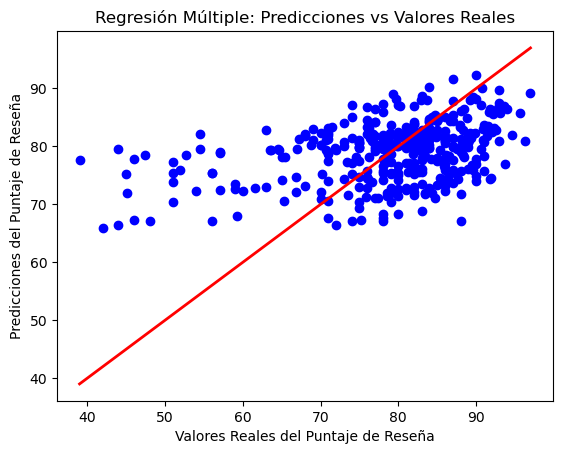

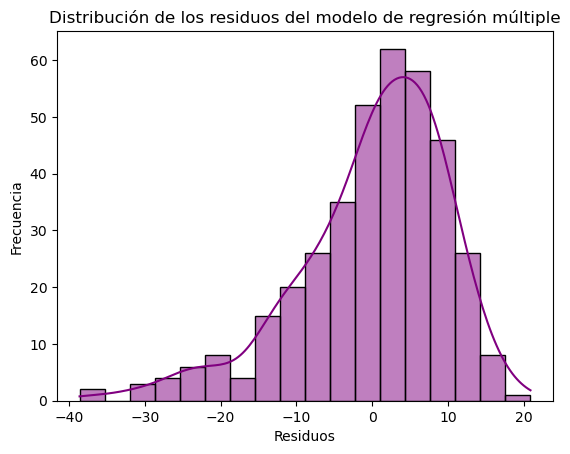

Promedio de los residuos: -0.01562348637733975
Desviación estándar de los residuos: 9.866995393583231

Género más vendido en América del Norte: Sports

Promedio de Puntaje de Reseña en videojuegos de Electronic Arts: 79.69831360946745

Mediana de ventas en Japón (sin títulos populares): 0.01

Mediana truncada de ventas en el género Adventure: 1.9116470588235295

Rango de ventas entre regiones en 2010: América del Norte    13.50
Europa                4.34
Japón                 5.64
Resto del Mundo       1.82
dtype: float64

Percentiles 25 y 75 para 'Metal Gear Solid: Peace Walker' en las distintas regiones:
      América del Norte  Europa  Japón  Resto del Mundo
0.25               0.41    0.34   0.96             0.21
0.75               0.41    0.34   0.96             0.21

Rango intercuartil alto de los tres géneros más vendidos en América del Norte (2005 y 2010):
Género
Action     0.6550
Misc       1.6950
Shooter    0.7425
Name: América del Norte, dtype: float64


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import trim_mean

# Paso 6: Mejorar el modelo

# Usamos varias características para la regresión múltiple
X = df[['Global', 'América del Norte', 'Europa', 'Japón', 'Género', 'Plataforma']]  # Variables predictoras
X = pd.get_dummies(X, drop_first=True)  # Convertir variables categóricas en variables dummy

y = df['Puntaje de Reseña']  # Variable a predecir

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R^2 (Coeficiente de determinación): {r2}")

# Ver los coeficientes de las características para ver cuál tiene mayor impacto
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes del modelo de regresión:")
print(coef)

# Visualización de los resultados
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valores Reales del Puntaje de Reseña')
plt.ylabel('Predicciones del Puntaje de Reseña')
plt.title('Regresión Múltiple: Predicciones vs Valores Reales')
plt.show()

# Analizar los residuos (diferencia entre las predicciones y los valores reales)
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, color='purple')
plt.title('Distribución de los residuos del modelo de regresión múltiple')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Verificar la normalidad de los residuos
print("Promedio de los residuos:", residuos.mean())
print("Desviación estándar de los residuos:", residuos.std())

### Análisis adicional basado en las preguntas planteadas:

# 1. Género más vendido en América del Norte
ventas_por_genero = df.groupby('Género')['América del Norte'].sum().sort_values(ascending=False)
print("\nGénero más vendido en América del Norte:", ventas_por_genero.idxmax())

# 2. Promedio de "Puntaje de Reseña" en videojuegos de "Electronic Arts"
promedio_reseña_ea = df[df['Casa Productora'] == 'Electronic Arts']['Puntaje de Reseña'].mean()
print("\nPromedio de Puntaje de Reseña en videojuegos de Electronic Arts:", promedio_reseña_ea)

# 3. Mediana de ventas en Japón (sin títulos populares)
ventas_japon = df['Japón']
ventas_japon_sin_populares = ventas_japon[ventas_japon < ventas_japon.quantile(0.95)]
mediana_ventas_japon = ventas_japon_sin_populares.median()
print("\nMediana de ventas en Japón (sin títulos populares):", mediana_ventas_japon)

# 4. Mediana truncada de ventas en el género "Adventure"
ventas_adventure = df[df['Género'] == 'Adventure']['Global']
mediana_truncada_adventure = trim_mean(ventas_adventure, proportiontocut=0.1)
print("\nMediana truncada de ventas en el género Adventure:", mediana_truncada_adventure)

# 5. Rango de ventas entre regiones en el año 2010
df_2010 = df[df['Año de Lanzamiento'] == 2010]
rango_ventas_2010 = df_2010[['América del Norte', 'Europa', 'Japón', 'Resto del Mundo']].max() - df_2010[['América del Norte', 'Europa', 'Japón', 'Resto del Mundo']].min()
print("\nRango de ventas entre regiones en 2010:", rango_ventas_2010)

# 6. Percentiles 25 y 75 para "Metal Gear Solid: Peace Walker"
titulo = 'Metal Gear Solid: Peace Walker'
ventas_titulo = df[df['Título del Juego'] == titulo][['América del Norte', 'Europa', 'Japón', 'Resto del Mundo']]
percentil_25_75 = ventas_titulo.quantile([0.25, 0.75])
print(f"\nPercentiles 25 y 75 para '{titulo}' en las distintas regiones:")
print(percentil_25_75)

# 7. Rango intercuartil alto de los tres géneros más vendidos en América del Norte (2005 y 2010)
df_2005_2010 = df[(df['Año de Lanzamiento'].isin([2005, 2010]))]
ventas_por_genero_am_norte = df_2005_2010.groupby('Género')['América del Norte'].sum().sort_values(ascending=False).head(3)
top_generos = ventas_por_genero_am_norte.index
df_top_generos = df_2005_2010[df_2005_2010['Género'].isin(top_generos)]
rango_intercuartil = df_top_generos.groupby('Género')['América del Norte'].quantile(0.75) - df_top_generos.groupby('Género')['América del Norte'].quantile(0.25)
print("\nRango intercuartil alto de los tres géneros más vendidos en América del Norte (2005 y 2010):")
print(rango_intercuartil)


In [ ]:
#Paso 7: Pruebas A/B y Procesamiento de Lenguaje Natural (PLN)

In [73]:
from scipy import stats

# 1. Realizamos una prueba A/B entre dos géneros (por ejemplo, "Adventure" y "Shooter")
genre_a_reviews = df[df['Género'] == 'Adventure']['Puntaje de Reseña'].dropna()
genre_b_reviews = df[df['Género'] == 'Shooter']['Puntaje de Reseña'].dropna()

# 2. Aplicamos el test t de Student para ver si hay diferencia significativa en los puntajes de reseña
t_stat, p_value = stats.ttest_ind(genre_a_reviews, genre_b_reviews)

# 3. Interpretamos el resultado
if p_value < 0.05:
    print("Hay una diferencia significativa en los puntajes de reseña entre los géneros 'Adventure' y 'Shooter'.")
else:
    print("No hay una diferencia significativa en los puntajes de reseña entre los géneros 'Adventure' y 'Shooter'.")


No hay una diferencia significativa en los puntajes de reseña entre los géneros 'Adventure' y 'Shooter'.


In [79]:
!pip install wordcloud

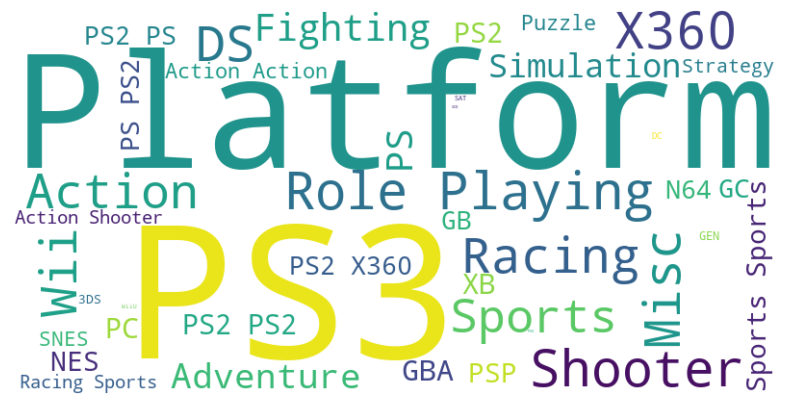

In [87]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('C:/Users/chris/Proyectos BEDU/Proyecto Análisis de datos en Python/Video Games Sales.csv')

# Eliminar filas con valores nulos
df = df.dropna()

# Renombrar columnas
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Rank': 'Rango',
    'Game Title': 'Título del Juego',
    'Platform': 'Plataforma',
    'Year': 'Año de Lanzamiento',
    'Genre': 'Género',
    'Publisher': 'Casa Productora',
    'North America': 'América del Norte',
    'Europe': 'Europa',
    'Japan': 'Japón',
    'Rest of World': 'Resto del Mundo',
    'Global': 'Global',
    'Review': 'Puntaje de Reseña'
})

# Limpiar y preparar las columnas
df['Título del Juego'] = df['Título del Juego'].str.strip().str.title()
df['Año de Lanzamiento'] = df['Año de Lanzamiento'].astype(int)
df['América del Norte'] = pd.to_numeric(df['América del Norte'], errors='coerce')
df['Europa'] = pd.to_numeric(df['Europa'], errors='coerce')
df['Japón'] = pd.to_numeric(df['Japón'], errors='coerce')
df['Resto del Mundo'] = pd.to_numeric(df['Resto del Mundo'], errors='coerce')
df['Global'] = pd.to_numeric(df['Global'], errors='coerce')

# 1. Generar nube de palabras basada en el 'Género' y 'Plataforma'
# Concatenamos las columnas 'Género' y 'Plataforma' para obtener una visión más completa
text = ' '.join(df['Género'].dropna()) + ' ' + ' '.join(df['Plataforma'].dropna())

# Creamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

# 2. Visualizamos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
